In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nibabel as nib
import cv2 as cv
import ipywidgets as widgets
from IPython.display import display
%matplotlib notebook


In [2]:
def load_and_plot(dir, protocol, time, sbref,layer):
    img = nib.load(dir)
    
    if time == 1:
        max = 489 if protocol == 'rs' else 331
        step = 10
    else:
        max = 63
        step = 1

    if sbref:
        plot_img = img.dataobj
    else:
        plot_img = img.dataobj[:, :, layer, :] if time else img.dataobj[:, :, :, 1]
    
    fig = plt.figure()
    plt.imshow(plot_img[:, :, 0], cmap="gray")
    plt.show()
    
    def update_values(value):
        plt.imshow(plot_img[:, :, value['new']], cmap="gray")
        fig.canvas.draw_idle()
        
    slider = widgets.IntSlider(1, min = 0, step = step, max = max)
    display(slider)
    
    slider.observe(update_values, names = 'value')


In [3]:
rs_processed = "imaging_data_eid1236578/rsfMRI/NIFTI/1236578_20227_2_0/rfMRI.ica/filtered_func_data_clean.nii"
ts_processed = "imaging_data_eid1236578/tfMRI/NIFTI/1236578_20249_2_0/tfMRI.feat/filtered_func_data.nii.gz"

rs_og = "imaging_data_eid1236578/rsfMRI/NIFTI/1236578_20227_2_0/rfMRI.nii.gz"
ts_og = "imaging_data_eid1236578/tfMRI/NIFTI/1236578_20249_2_0/tfMRI.nii.gz"

rs_sbref = "imaging_data_eid1236578/rsfMRI/NIFTI/1236578_20227_2_0/rfMRI_SBREF.nii.gz"
ts_sbref = "imaging_data_eid1236578/tfMRI/NIFTI/1236578_20249_2_0/tfMRI_SBREF.nii.gz"

<IPython.core.display.Javascript object>


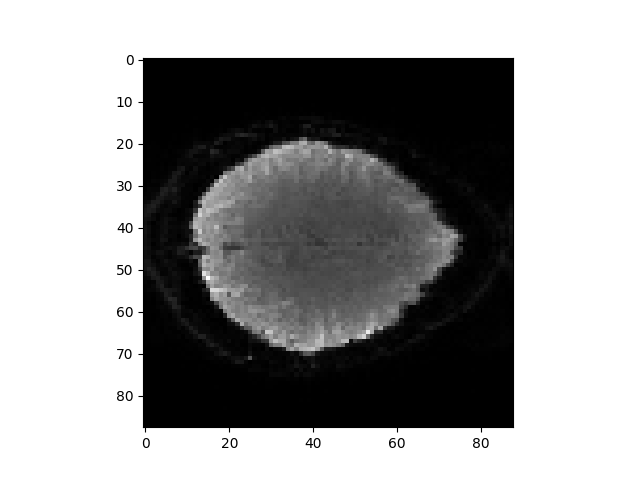

IntSlider(value=1, max=63)

In [4]:
load_and_plot(rs_og, 'rs', 0, 0, 24)

In [ ]:
load_and_plot(rs_processed, 'rs', 1, 0, 22)

# amygdala roughly around 45x, 35/56y, 22z

In [ ]:
load_and_plot(rs_sbref, 'rs', 1, 1)

<IPython.core.display.Javascript object>


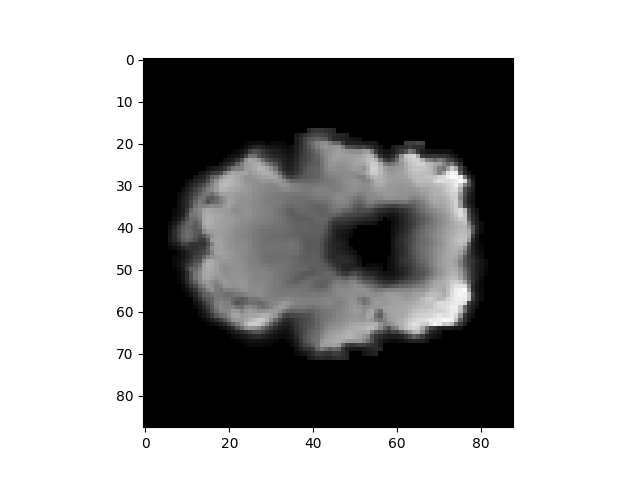

IntSlider(value=1, max=331, step=10)

In [6]:
load_and_plot(ts_processed, 'ts', 1, 0, 22)

In [ ]:
load_and_plot(ts_og, 'ts', 1, 0, 22)

In [ ]:
load_and_plot(ts_sbref, 'ts', 0, 1,0)